# Курсовая работа
## Выполнил студент группы БФИ2201 Жанбаев Исхак

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

# Ход работы:

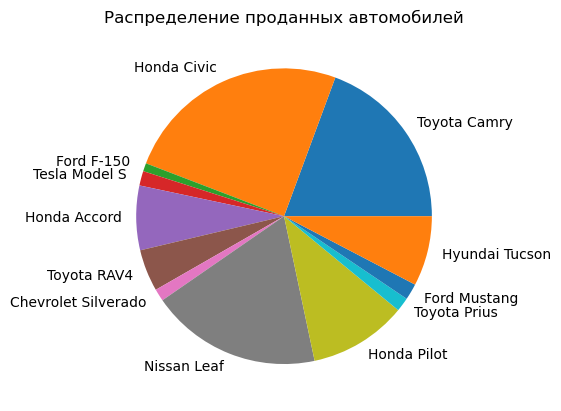

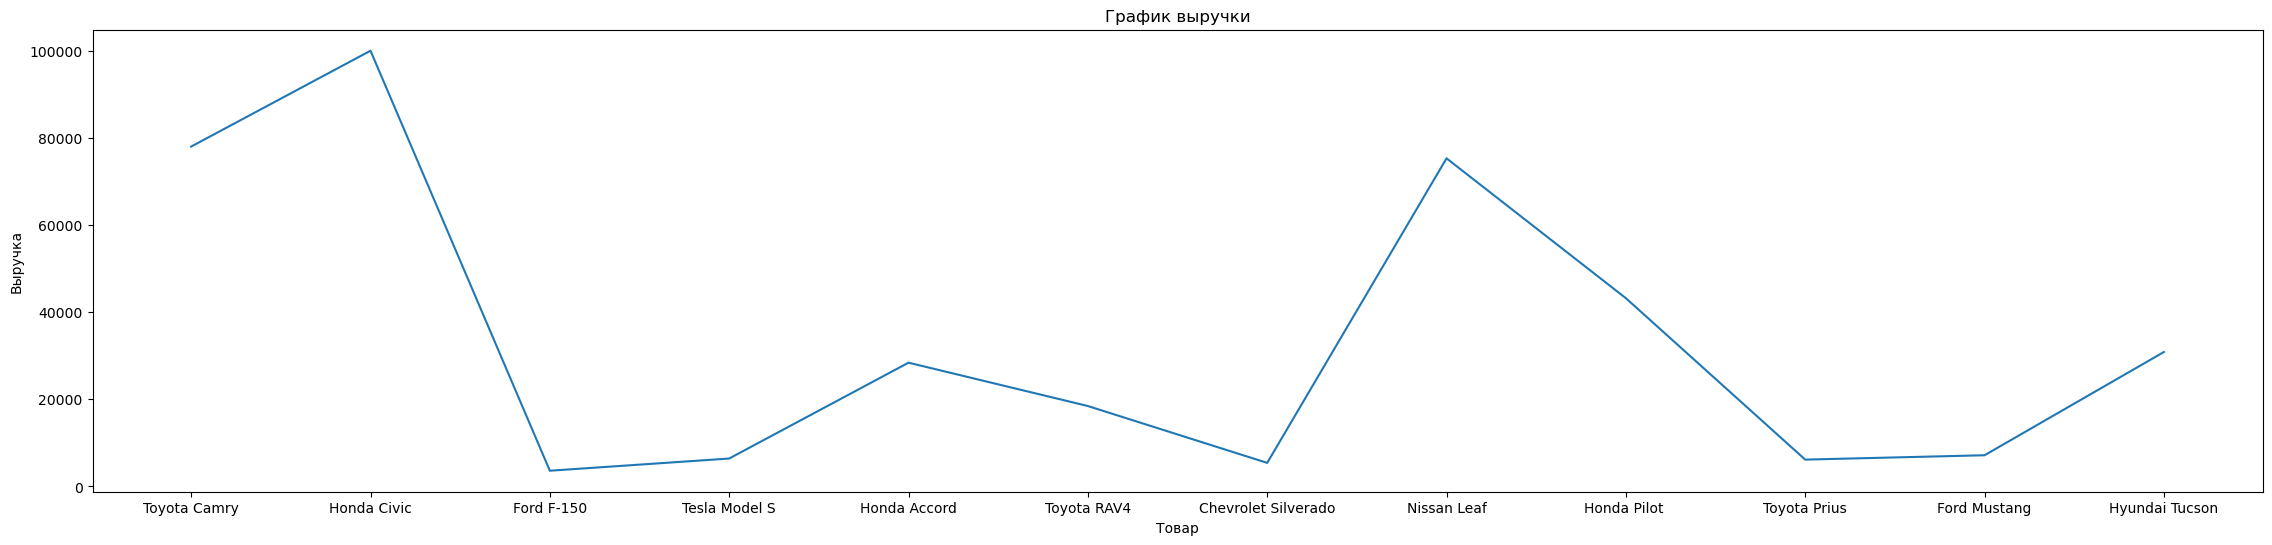


Общая выручка магазина: 402900 рублей
Товар, который был продан наибольшее количество раз: Toyota Camry
Товар с наибольшей выручкой: Honda Civic


Toyota Camry продан 500 раз, процент товара от общей выручки составяет - 19.36%
Honda Civic продан 500 раз, процент товара от общей выручки составяет - 24.82%
Ford F-150 продан 300 раз, процент товара от общей выручки составяет - 0.89%
Tesla Model S продан 200 раз, процент товара от общей выручки составяет - 1.59%
Honda Accord продан 200 раз, процент товара от общей выручки составяет - 7.05%
Toyota RAV4 продан 150 раз, процент товара от общей выручки составяет - 4.58%
Chevrolet Silverado продан 100 раз, процент товара от общей выручки составяет - 1.34%
Nissan Leaf продан 100 раз, процент товара от общей выручки составяет - 18.69%
Honda Pilot  продан 100 раз, процент товара от общей выручки составяет - 10.72%
Toyota Prius продан 50 раз, процент товара от общей выручки составяет - 1.53%
Ford Mustang продан 50 раз, процент товара от общей выру

In [50]:
# Подключение нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import csv


# Создаем класс узла списка
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


# Создаем класс хэш-таблицы

class HashTable:
    def __init__(self):
        self.capacity = 10  # начальная емкость таблицы
        self.size = 0  # количество элементов в таблице
        self.buckets = [None] * self.capacity  # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в хэш-таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:  # проходим по всем элементам цепочки
            if node.key == key:
                node.value = value
                return
            node = node.next

        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2
        new_buckets = [None] * new_capacity

        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets


#
def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


try:
    data = pd.read_csv('table.csv', sep=';')
    with open("table.csv", encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter=";")
        hsht1 = HashTable()
        hsht2 = HashTable()
        vyr, max_tovar = 0, 0  # общая суммарная выручка и максимальная количество проданного товара

        max_count = ""  # товар проданный максимальное количесво раз
        count_row = 0
        names_array, vyr_array = [], []  # массив для ключей / название товаров и массив для выручки

        for row in file_reader:  # читаем csv построчно
            if count_row != 0:
                vyr += int(row[6])  # общая выручка

                if max_tovar < int(row[4]):  # товар, который был продан максимальное количество раз
                    max_tovar = int(row[4])
                    max_count = row[2]

                vyr_array.append(int(row[6]))  # добавляем в массив с выручкой
                names_array.append(str(row[2]))  # добавляем в массив с названиями
                hsht2.add(str(row[6]), row[2])  # в хеш таблицу записываем значение выручки/ключ и товар

                hsht1.add(str(row[2]), row[4])  # добавляем в хэш-таблицу товар/ключ и количество его продаж
                hsht1.add(str(row[2]) + "1", row[6])  # добавляем в хэш-таблицу товар/ключ и его выручку
            count_row += 1
        plt.pie(vyr_array, labels=names_array)
        plt.title("Распределение проданных автомобилей")
        plt.show()

        plt.figure(figsize=(28, 6))
        plt.plot(names_array, vyr_array)

        plt.xlabel('Товар')  # Подпись для оси х
        plt.ylabel('Выручка')  # Подпись для оси y
        plt.title('График выручки')  # Название
        plt.show()
        result = bubble_sort(vyr_array)

        print(f'\nОбщая выручка магазина: {vyr} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {max_count}')
        print(f'Товар с наибольшей выручкой: {hsht2.get(str(result[-1]))}\n\n')

        for item in range(0, (count_row - 1), 1):  # выводим
            print(
                f'{names_array[item]} продан {hsht1.get(names_array[item])} раз, процент товара от общей выручки составяет - {round(int(hsht1.get(names_array[item] + "1")) / vyr * 100, 2)}%')

        # сортируем массив с выручками


except ValueError as e:
    print(f"Ошибка при обработке данных файла:{e}")  # Ошибка если что то не так с данными
except Exception as e:  # Иные ошибки
    print(f"Неизвестная ошибка:{e}")

# Вывод:

Написал программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.
Рассчитал общую выручку магазина.
Нашёл товар, который был продан наибольшее количество раз.
Нашёл товар, который принес наибольшую выручку.
Составил отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.  